<a href="https://colab.research.google.com/github/logic25/project2/blob/main/Pro2_TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technical Analysis

## Project 2 Team 3

In [ ]:
# Import Libraries and Dependencies

import pandas as pd
import numpy as np
from pathlib import Path
import ta
pd.set_option('display.max_columns', None)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

# Import Data and Cleaning

In [ ]:
csv_path = Path('BTC_USD.csv')
btc_df=pd.read_csv(csv_path)

In [ ]:
# Set index as datetime object and drop extraneous columns
btc_df.set_index(pd.to_datetime(btc_df['Date'], infer_datetime_format=True), inplace=True)

In [ ]:
# Drop NAs and calculate daily percent return
btc_df['daily_return'] = btc_df['Close'].dropna().pct_change()

In [ ]:
# Add features from TA library
btc_df = ta.add_all_ta_features(btc_df, "Open", "High", "Low", "Close", "Volumen", fillna=True)

In [ ]:
# Check dataframe
btc_df.head()

Date    Close     Open     High      Low  Volumen Change %  \
Date                                                                          
2018-01-18  18-Jan-18  11045.0  11101.0  11881.0  10515.0    85240   -0.33%   
2018-01-19  19-Jan-18  11476.0  11036.0  11879.0  10649.0    48550    3.90%   
2018-01-20  20-Jan-18  12728.0  11462.0  13002.0  11425.0    46300   10.91%   
2018-01-21  21-Jan-18  11514.0  12732.0  12732.0  11020.0    53620   -9.54%   
2018-01-22  22-Jan-18  10771.0  11519.0  11886.0  10009.0    66350   -6.45%   

            daily_return    volume_adi  volume_obv  volume_cmf     volume_fi  \
Date                                                                           
2018-01-18           NaN -19094.758419       85240   -0.224012  0.000000e+00   
2018-01-19      0.039022  -2358.823459      133790   -0.017631  2.092505e+07   
2018-01-20      0.109097  27852.146737      180090    0.154657  2.621684e+07   
2018-01-21     -0.095380   5176.399074      126470    0.022149  1.317234e+07   
2018-01-22     -0.064530  -7301.784198       60120   -0.024334  4.247998e+06   

            volume_mfi     volume_em  volume_sma_em    volume_vpt  \
Date                                                                
2018-01-18   50.000000  0.000000e+00   0.000000e+00  19541.851219   
2018-01-19  100.000000  1.672091e+08   1.672091e+08  21452.755716   
2018-01-20  100.000000  3.234042e+09   1.700626e+09   6945.729445   
2018-01-21   64.064711 -1.077583e+09   7.745561e+08    -63.087245   
2018-01-22   45.375333 -2.626668e+09  -7.575006e+07  -9395.864360   

             volume_nvi   volume_vwap  volatility_atr  volatility_bbm  \
Date                                                                    
2018-01-18  1000.000000  11147.000000             0.0    11045.000000   
2018-01-19  1039.022182  11215.100879             0.0    11260.500000   
2018-01-20  1152.376641  11515.874544             0.0    11749.666667   
2018-01-21  1152.376641  11570.813487             0.0    11690.750000   
2018-01-22  1152.376641  11419.975516             0.0    11506.800000   

            volatility_bbh  volatility_bbl  volatility_bbw  volatility_bbp  \
Date                                                                         
2018-01-18    11045.000000    11045.000000        0.000000        0.000000   
2018-01-19    11691.500000    10829.500000        7.655077        0.750000   
2018-01-20    13177.291579    10322.041755       24.300688        0.842644   
2018-01-21    12943.841677    10437.658323       21.437319        0.429474   
2018-01-22    12847.543316    10166.056684       23.303496        0.225600   

            volatility_bbhi  volatility_bbli  volatility_kcc  volatility_kch  \
Date                                                                           
2018-01-18              0.0              0.0    11147.000000    12513.000000   
2018-01-19              0.0              0.0    11240.833333    12538.833333   
2018-01-20              0.0              0.0    11622.222222    13013.222222   
2018-01-21              0.0              0.0    11655.500000    13126.750000   
2018-01-22              0.0              0.0    11502.133333    13054.533333   

            volatility_kcl  volatility_kcw  volatility_kcp  volatility_kchi  \
Date                                                                          
2018-01-18     9781.000000       24.508836        0.462665              0.0   
2018-01-19     9942.833333       23.094373        0.590588              0.0   
2018-01-20    10231.222222       23.936902        0.897476              0.0   
2018-01-21    10184.250000       25.245592        0.451912              0.0   
2018-01-22     9949.733333       26.993253        0.264515              0.0   

            volatility_kcli  volatility_dcl  volatility_dch  volatility_dcm  \
Date                                                                          
2018-01-18              0.0         10515.0         11881.0         11198.0   
2018-01

<AxesSubplot:title={'center':'Bitcoin Closing Price'}, xlabel='Date'>

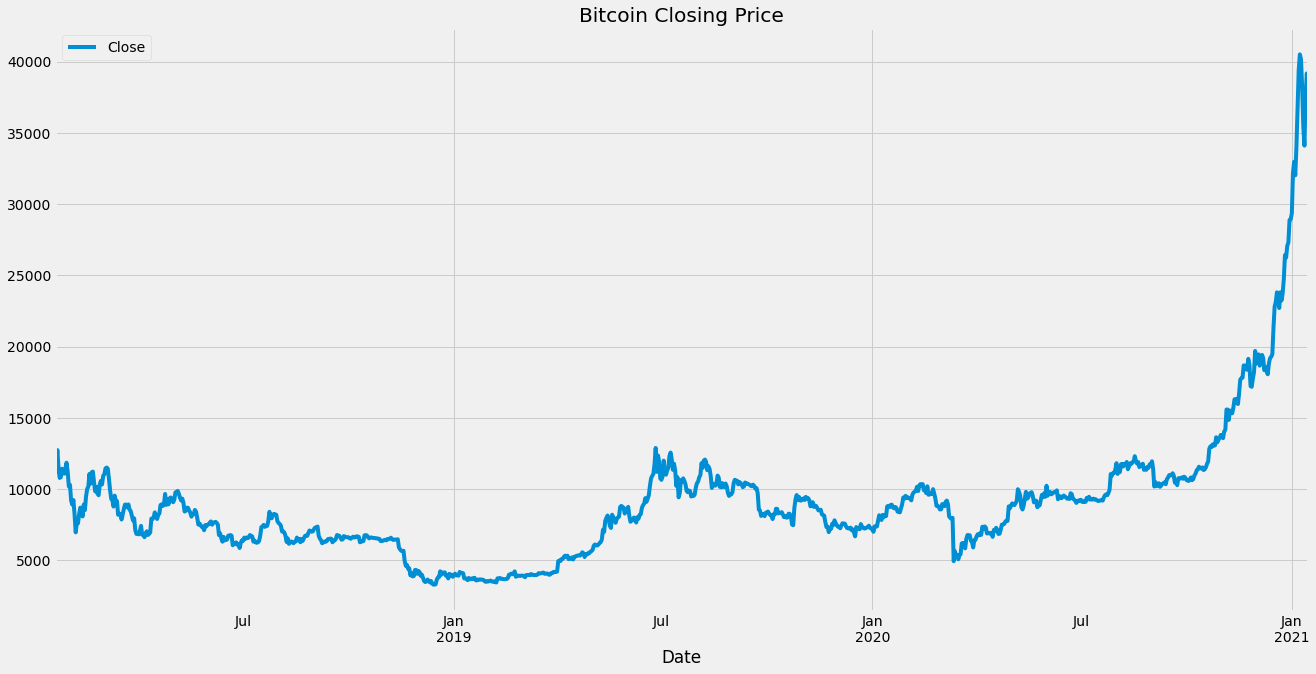

In [ ]:
# Plot Bitcoin Closing Prices
btc_df[['Close']].plot(figsize=(20,10), title="Bitcoin Closing Price")

# Construct Technical Analysis Trading Signals and Charts for the different indicators 

### We analyzed 24 different technical analysis fetaures from the TA library and we chose the 10 that showed stronger results

### List of Techinal Analysis
    1. Exponential Moving Average (Closing Price)
    2. Exponential Moving Average (Daily Vol)
    3. Bollinger Bands
    4. Moving Average Convergence Divergence
    5. Relative Strengh Index
    6. Chaikin Money Flow
    7. Ichimoku
    8. Kelner Channel
    9. Aroon Indicator
    10. Vortex Indicator   

# Exponential Moving Average (EMA)

<AxesSubplot:title={'center':'Exponential Moving Average of Closing Prices'}, xlabel='Date'>

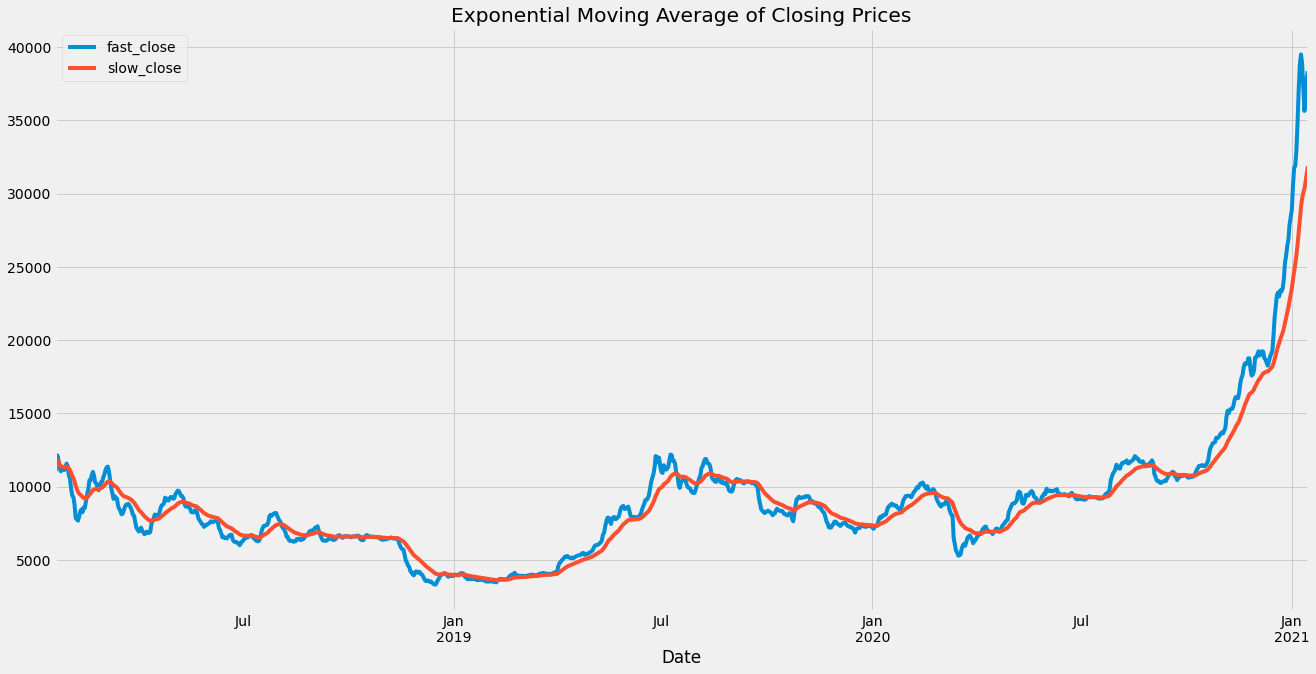

In [ ]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
btc_df['fast_close'] = btc_df['Close'].ewm(halflife=short_window).mean()
btc_df['slow_close'] = btc_df['Close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
btc_df['ema_long'] = np.where(btc_df['fast_close'] > btc_df['slow_close'], 1.0, 0.0)
btc_df['ema_short'] = np.where(btc_df['fast_close'] < btc_df['slow_close'], -1.0, 0.0)
btc_df['ema_signal'] = btc_df['ema_long'] + btc_df['ema_short']

#Plot EMA
btc_df[['fast_close', 'slow_close']].plot(figsize=(20,10), title='Exponential Moving Average of Closing Prices')

# Exponential Moving Average of Daily Return Volatility (EMV)

In [ ]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
btc_df['fast_vol'] = btc_df['daily_return'].ewm(halflife=short_vol_window).std()
btc_df['slow_vol'] = btc_df['daily_return'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
btc_df['emv_long'] = np.where(btc_df['fast_vol'] < btc_df['slow_vol'], 1.0, 0.0)
btc_df['emv_short'] = np.where(btc_df['fast_vol'] > btc_df['slow_vol'], -1.0, 0.0) 
btc_df['emv_signal'] = btc_df['emv_long'] + btc_df['emv_short']

<AxesSubplot:title={'center':'Exponential Moving Average of Return Volatility'}, xlabel='Date'>

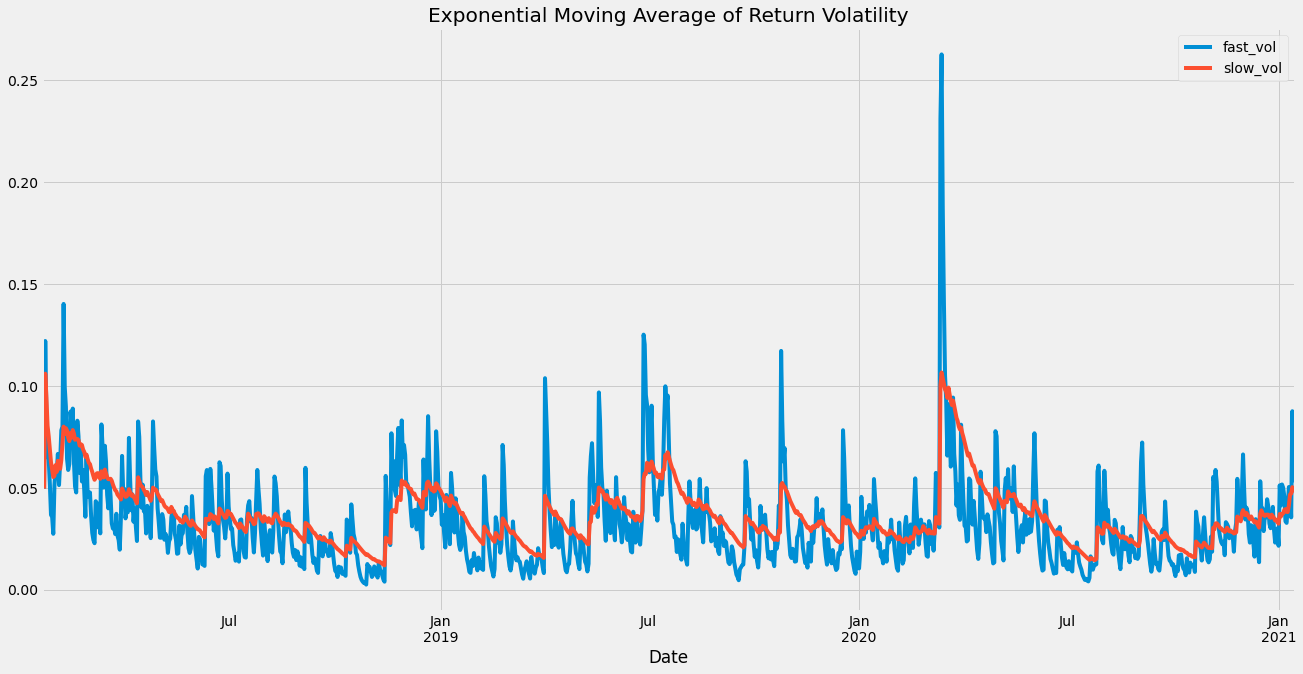

In [ ]:
# Plot EMV
btc_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10), title='Exponential Moving Average of Return Volatility')

# Bollinger Bands (BB)

In [ ]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
btc_df['bollinger_mid_band'] = btc_df['Close'].rolling(window=bollinger_window).mean()
btc_df['bollinger_std'] = btc_df['Close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
btc_df['bollinger_upper_band']  = btc_df['bollinger_mid_band'] + (btc_df['bollinger_std'] * 1)
btc_df['bollinger_lower_band']  = btc_df['bollinger_mid_band'] - (btc_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
btc_df['bb_long'] = np.where(btc_df['Close'] < btc_df['bollinger_lower_band'], 1.0, 0.0)
btc_df['bb_short'] = np.where(btc_df['Close'] > btc_df['bollinger_upper_band'], -1.0, 0.0)
btc_df['bb_signal'] = btc_df['bb_long'] + btc_df['bb_short']


<AxesSubplot:title={'center':'Bollinger Bands'}, xlabel='Date'>

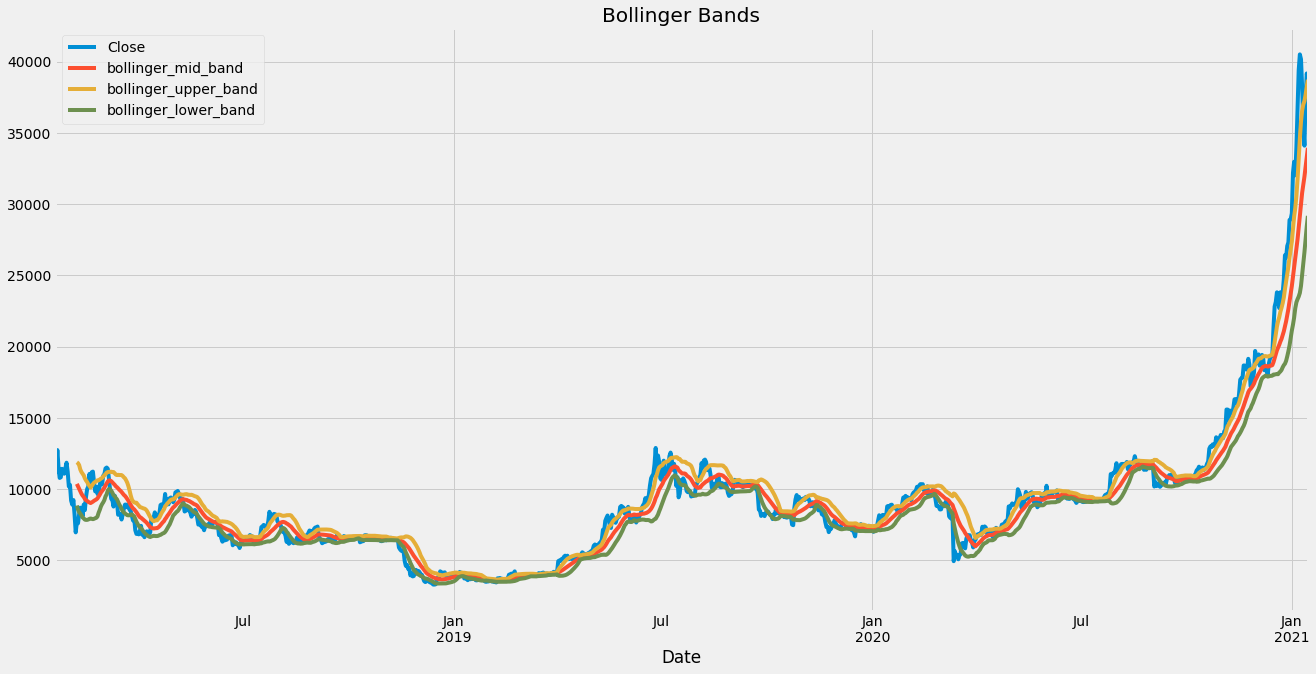

In [ ]:
#Plot BB
btc_df[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10), title='Bollinger Bands')

# Moving Average Convergence Divergence (MACD)

In [ ]:
#Calculate the Short Term Exponential Moving Average
ShortEMA = btc_df.Close.ewm(span=12, adjust=False).mean() #AKA Fast moving average
#Calculate the Long Term Exponential Moving Average
LongEMA = btc_df.Close.ewm(span=26, adjust=False).mean() #AKA Slow moving average
#Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

In [ ]:
#Create new columns for the data frame 
btc_df['MACD'] = MACD
btc_df['Signal Line'] = signal

In [ ]:
#Calculate MACD trading Signals
btc_df['macd_long'] = np.where(btc_df['MACD'] > btc_df['Signal Line'], 1.0, 0.0)
btc_df['macd_short'] = np.where(btc_df['MACD'] < btc_df['Signal Line'], -1.0, 0.0)
btc_df['macd_signal'] = btc_df['macd_long'] + btc_df['macd_short']

<AxesSubplot:title={'center':'MACD'}, xlabel='Date'>

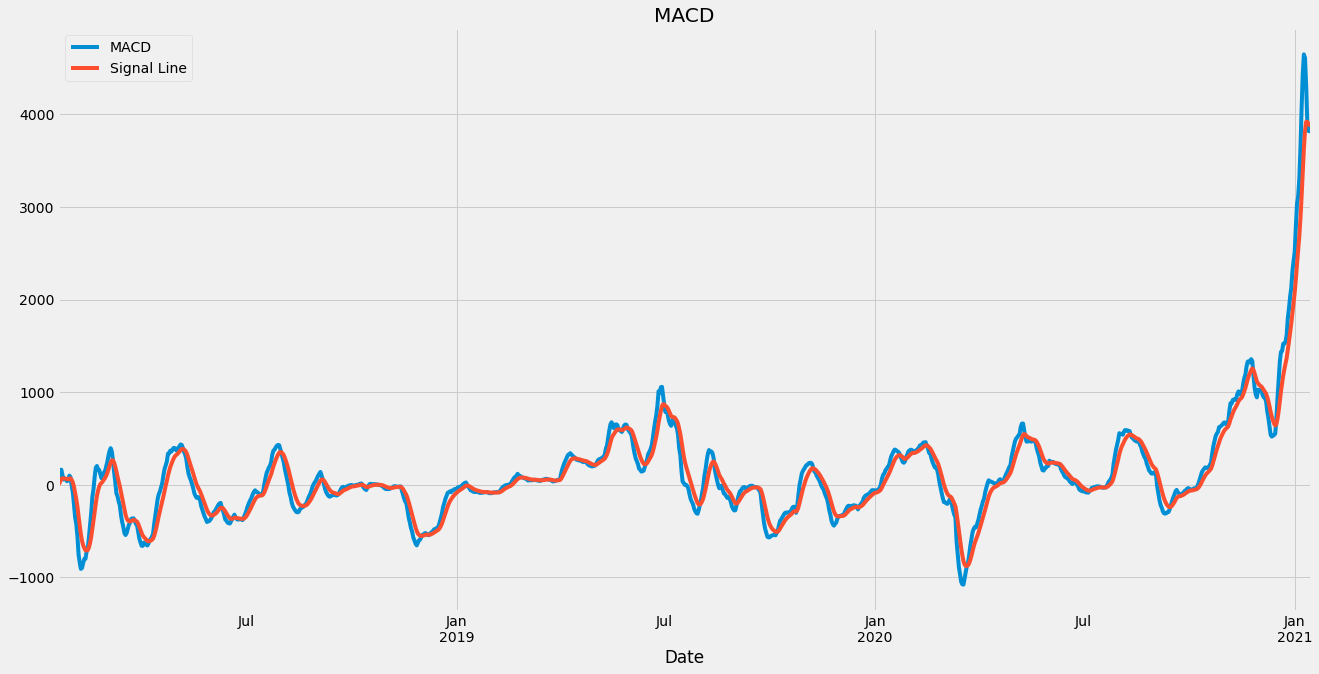

In [ ]:
#Plot MACD
btc_df[['MACD','Signal Line']].plot(figsize=(20,10), title = "MACD")

# Relative Strengh Index (RSI)

In [ ]:
delta = btc_df['Close'].diff(1) #Use diff() function to find the discrete difference over the column axis with period value equal to 1
delta = delta.dropna() # or delta[1:]
up =  delta.copy() #Make a copy of this object's indices and data
down = delta.copy() #Make a copy of this object's indices and data
up[up < 0] = 0 
down[down > 0] = 0 
time_period = 14
AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())
RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0/ (1.0 + RS))

In [ ]:
btc_df["RSI"] = RSI

In [ ]:
#Calculate RSI Trading Signal
btc_df['rsi_long'] = np.where(btc_df['RSI'] < 30, 1.0, 0.0)
btc_df['rsi_short'] = np.where(btc_df['RSI'] > 70, -1.0, 0.0)
btc_df['rsi_signal'] = btc_df['rsi_long'] + btc_df['rsi_short']

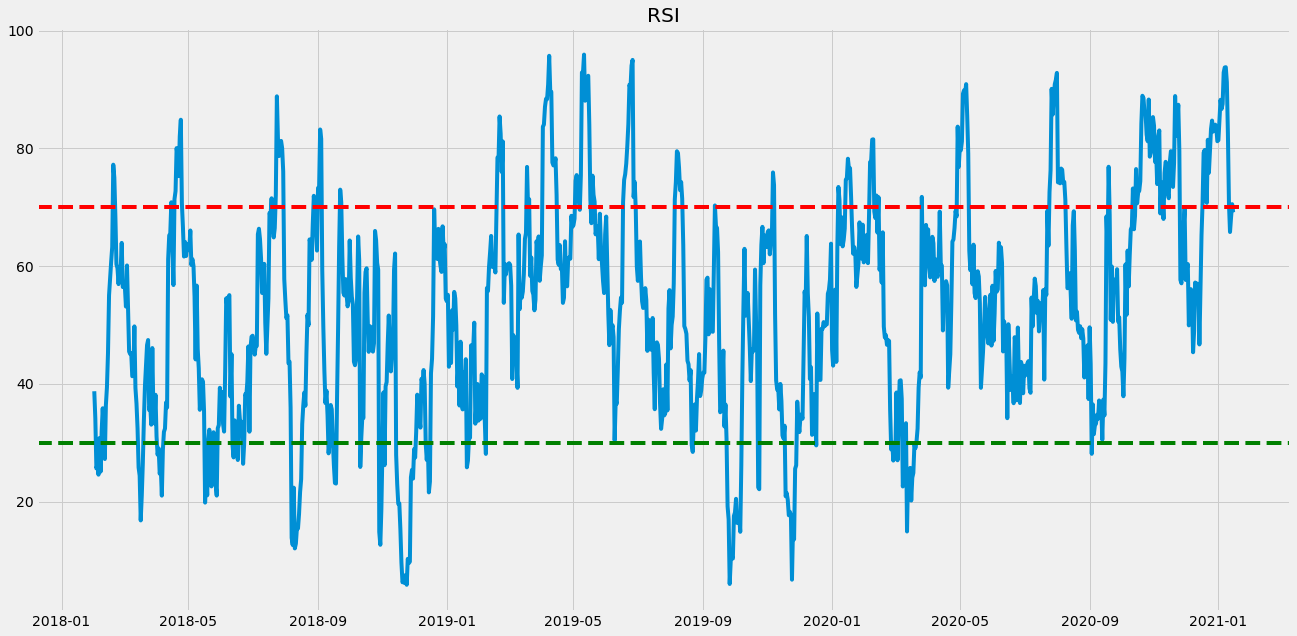

In [ ]:
# Plot RSI
new_df = pd.DataFrame()
new_df['RSI'] = RSI
plt.figure(figsize=(20,10))
plt.title('RSI')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(30, linestyle='--',color = 'green')
plt.axhline(70, linestyle='--', color = 'red')

# Chaikin Money Flow (CMF)

In [ ]:
# Calculate Trading Signal
btc_df['cmf_long'] = np.where(btc_df['volume_cmf'] > 0, 1.0, 0.0)
btc_df['cmf_short'] = np.where(btc_df['volume_cmf'] < 0, -1.0, 0.0)
btc_df['cmf_signal'] = btc_df['cmf_long'] + btc_df['cmf_short']


<AxesSubplot:title={'center':'CMF'}, xlabel='Date'>

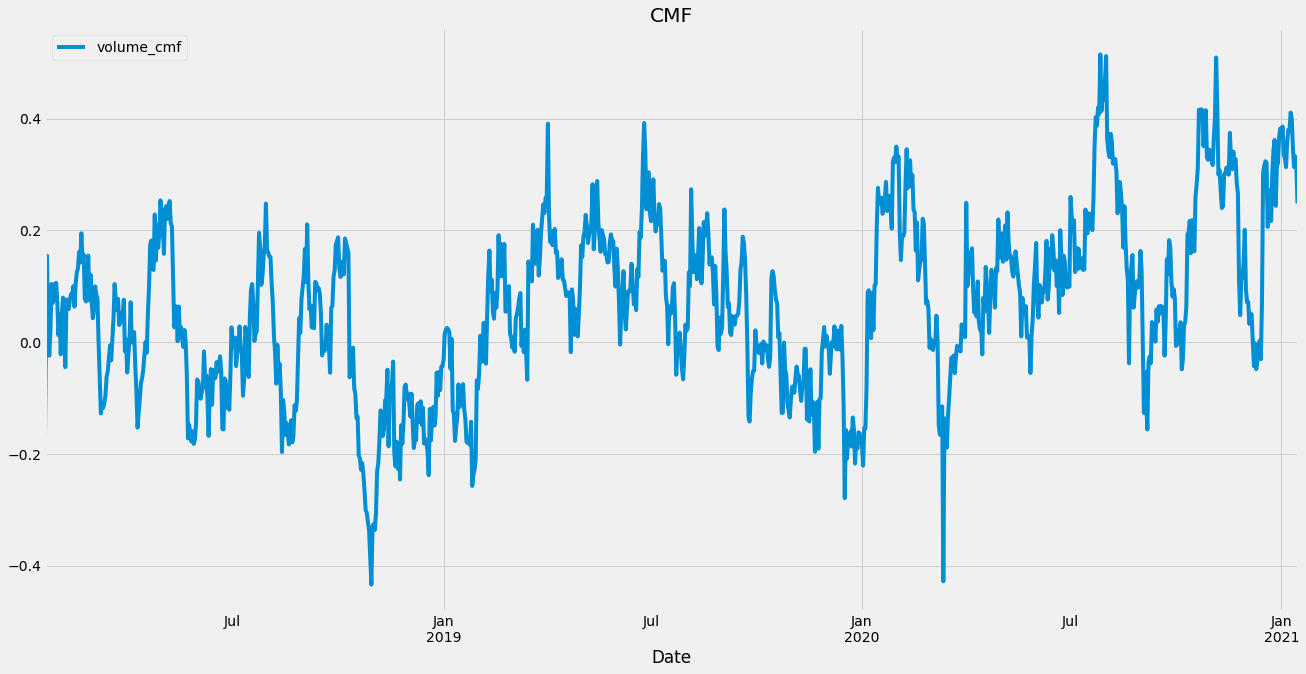

In [ ]:
# Plot CMF
btc_df[['volume_cmf']].plot(figsize=(20,10), title="CMF")


In [ ]:
#ICHIMOKU

In [ ]:
# Calculate Trading Signal
btc_df['ichi_long'] = np.where(btc_df['trend_ichimoku_a'] > btc_df['trend_ichimoku_b'], 1.0, 0.0)
btc_df['ichi_short'] = np.where(btc_df['trend_ichimoku_a'] < btc_df['trend_ichimoku_b'], -1.0, 0.0)
btc_df['ichi_signal'] = btc_df['ichi_long'] + btc_df['ichi_short']

<AxesSubplot:title={'center':'Ichimoku|'}, xlabel='Date'>

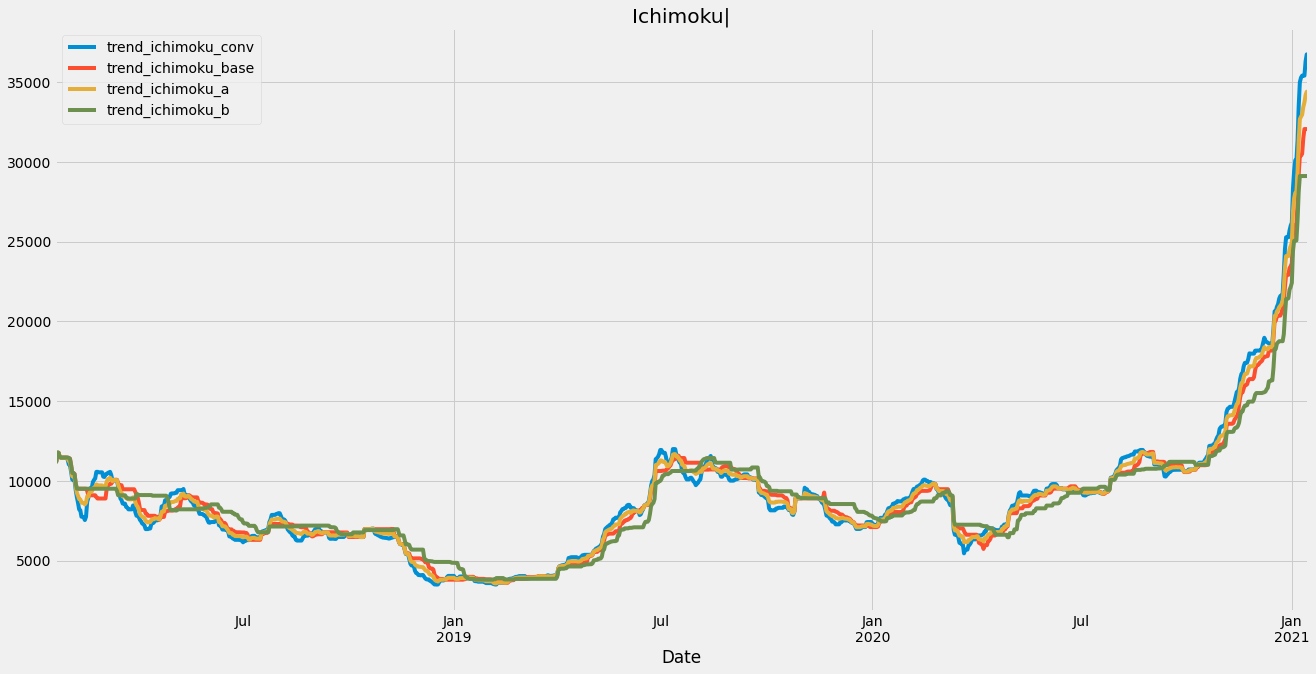

In [ ]:
# Plot Ichimoku
btc_df[['trend_ichimoku_conv','trend_ichimoku_base','trend_ichimoku_a','trend_ichimoku_b']].plot(figsize=(20,10), title="Ichimoku|")

# Keltner Channel

In [ ]:
# Calculate Trading Signal
btc_df['kel_long'] = np.where(btc_df['volatility_kchi'] >1, 1.1, 0.0)
btc_df['kel_short'] = np.where(btc_df['volatility_kcli'] <0.2, -1.0, 0.0)
btc_df['kel_signal'] = btc_df['kel_long'] + btc_df['kel_short']

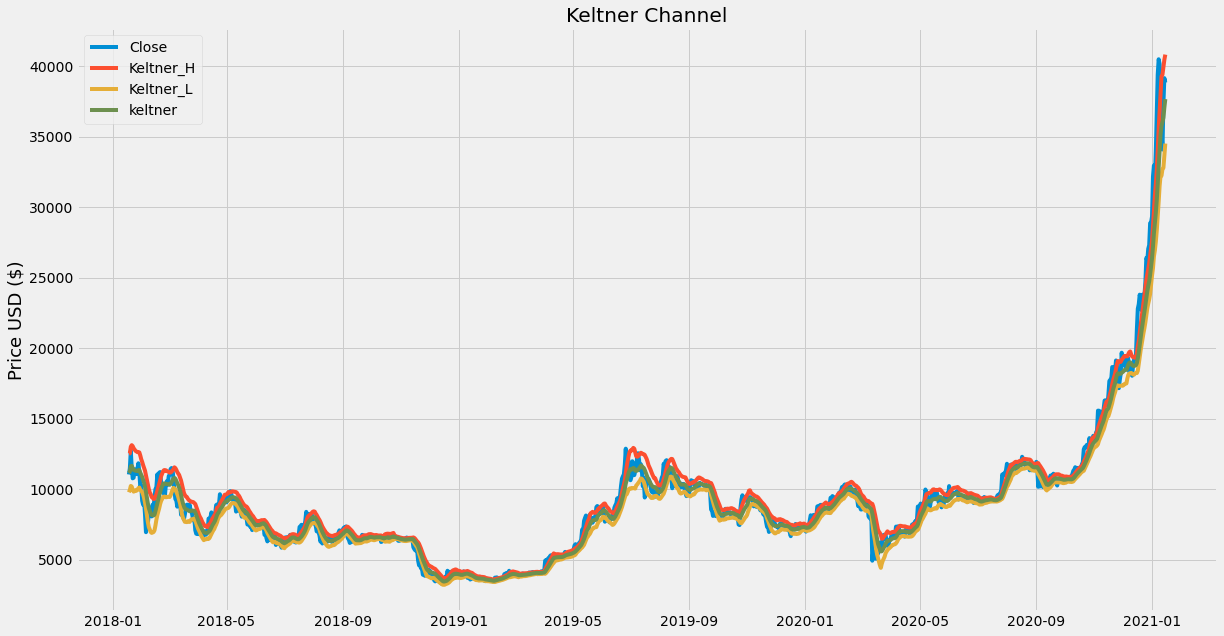

In [ ]:
# Plot Keltner
keltner_df = pd.DataFrame()
keltner_df['Close'] = btc_df['Close']
keltner_df['Keltner_H'] =btc_df['volatility_kch']
keltner_df['Keltner_L'] =btc_df['volatility_kcl']
keltner_df['keltner'] = btc_df['volatility_kcc']
plt.figure(figsize=(18.2,10))
plt.plot(keltner_df.index, keltner_df['Close'])
plt.plot(keltner_df['Keltner_H'])
plt.plot(keltner_df['Keltner_L'])
plt.plot(keltner_df['keltner'])
#,keltner_df['Low'],keltner_df['keltner'])
plt.title('Keltner Channel')
plt.ylabel('Price USD ($)',fontsize=18)
plt.legend(keltner_df.columns.values, loc='upper left')
plt.show()

# Aroon Indicator

In [ ]:
# Calculte trading signal
btc_df['aro_long'] = np.where(btc_df['trend_aroon_up'] > btc_df['trend_aroon_down'], 1.0, 0.0)
btc_df['aro_short'] = np.where(btc_df['trend_aroon_up'] < btc_df['trend_aroon_down'], -1.0, 0.0)
btc_df['aro_signal'] = btc_df['aro_long'] + btc_df['aro_short']

<AxesSubplot:title={'center':'Aroon Indicator'}, xlabel='Date'>

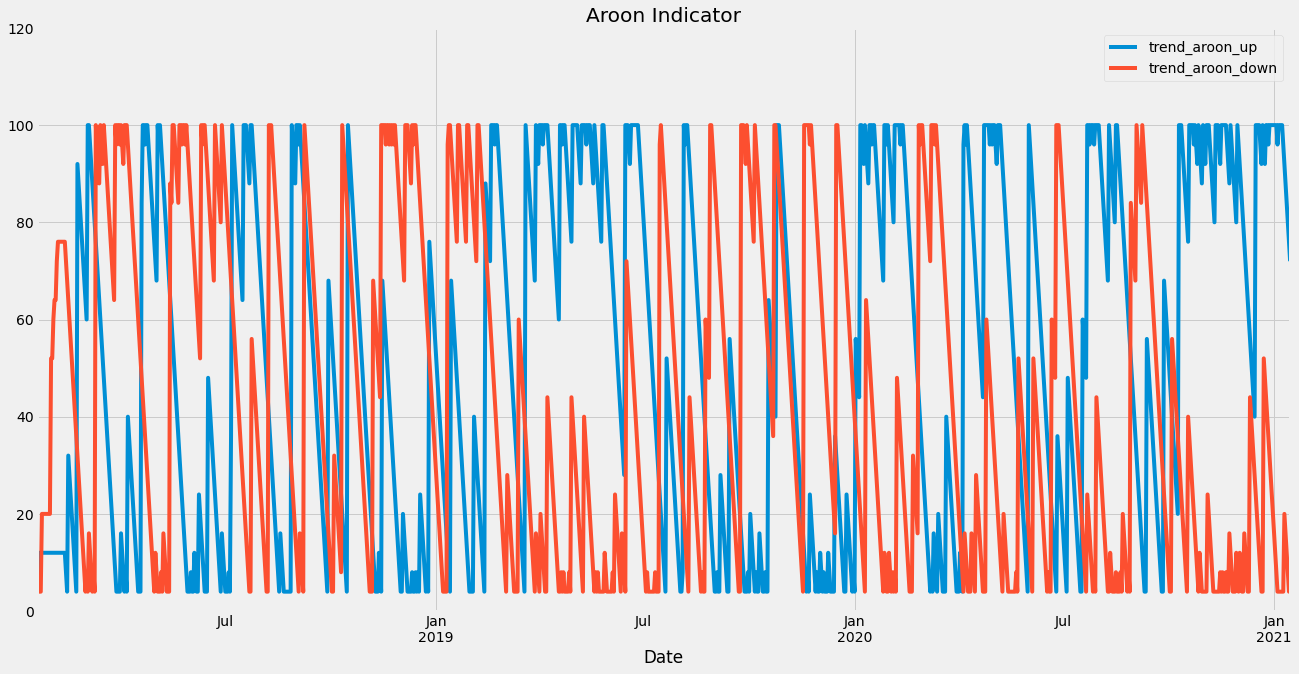

In [ ]:
# Plot Aroon
btc_df[['trend_aroon_up','trend_aroon_down']].plot(figsize=(20,10), title="Aroon Indicator", ylim=(0, 120))

# Vortex Indicator

In [ ]:
#Calculate trading signal
btc_df['vor_long'] = np.where(btc_df['trend_vortex_ind_diff'] >= 1, 1.0, 0.0)
btc_df['vor_short'] = np.where(btc_df['trend_vortex_ind_diff'] < 0, -1.0, 0.0)
btc_df['vor_signal'] = btc_df['vor_long'] + btc_df['vor_short']

<AxesSubplot:xlabel='Date'>

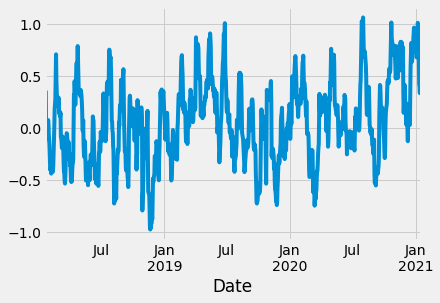

In [ ]:
btc_df['trend_vortex_ind_diff'].plot()

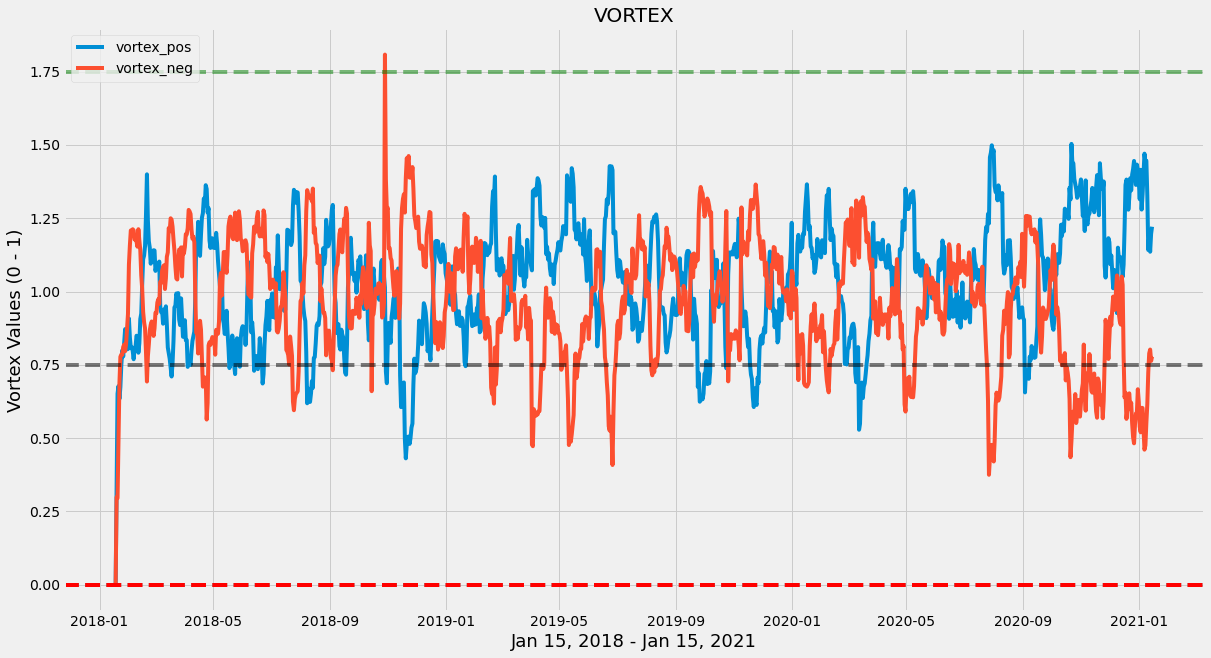

In [ ]:
#Plot Vortex
vortex_df = pd.DataFrame()
vortex_df['Vortex'] = btc_df['trend_vortex_ind_diff']
vortex_df['vortex_pos']= btc_df['trend_vortex_ind_pos']
vortex_df['vortex_neg']= btc_df['trend_vortex_ind_neg']
plt.figure(figsize=(18.2,10))
vortex_df = vortex_df.drop(columns=['Vortex'])
plt.title('VORTEX')
plt.plot(vortex_df.index, vortex_df['vortex_pos'],vortex_df['vortex_neg'])
plt.legend(vortex_df.columns.values, loc='upper left')
plt.axhline(0, linestyle='--', alpha=0.5, color = 'black')
plt.axhline(1.75, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(0, linestyle='--',color = 'red')
plt.axhline(0.75, linestyle='--', alpha=0.5, color = 'black')
plt.xlabel('Jan 15, 2018 - Jan 15, 2021',fontsize=18)
plt.ylabel('Vortex Values (0 - 1)',fontsize=18)
plt.show()

# Dataframe with OHLCV and Trading Signals

In [ ]:
btc_df

Date    Close     Open     High      Low  Volumen Change %  \
Date                                                                          
2018-01-18  18-Jan-18  11045.0  11101.0  11881.0  10515.0    85240   -0.33%   
2018-01-19  19-Jan-18  11476.0  11036.0  11879.0  10649.0    48550    3.90%   
2018-01-20  20-Jan-18  12728.0  11462.0  13002.0  11425.0    46300   10.91%   
2018-01-21  21-Jan-18  11514.0  12732.0  12732.0  11020.0    53620   -9.54%   
2018-01-22  22-Jan-18  10771.0  11519.0  11886.0  10009.0    66350   -6.45%   
...               ...      ...      ...      ...      ...      ...      ...   
2021-01-11  11-Jan-21  35476.0  38226.0  38226.0  31842.0    48040   -7.19%   
2021-01-12  12-Jan-21  34103.0  35448.0  35838.6  33616.0    22180   -3.87%   
2021-01-13  13-Jan-21  37375.0  34106.0  37418.0  33160.0    14890    9.59%   
2021-01-14  14-Jan-21  39170.0  37374.0  39750.0  37193.0    12970    4.80%   
2021-01-15  15-Jan-21  38856.0  39145.0  39476.0  38856.0    12060   -0.80%   

            daily_return     volume_adi  volume_obv  volume_cmf     volume_fi  \
Date                                                                            
2018-01-18           NaN  -19094.758419       85240   -0.224012  0.000000e+00   
2018-01-19      0.039022   -2358.823459      133790   -0.017631  2.092505e+07   
2018-01-20      0.109097   27852.146737      180090    0.154657  2.621684e+07   
2018-01-21     -0.095380    5176.399074      126470    0.022149  1.317234e+07   
2018-01-22     -0.064530   -7301.784198       60120   -0.024334  4.247998e+06   
...                  ...            ...         ...         ...           ...   
2021-01-11     -0.071941  718750.900873      231370    0.347446 -9.092482e+06   
2021-01-12     -0.038702  706290.742500      209190    0.313157 -1.214400e+07   
2021-01-13      0.095945  720880.005065      224080    0.332341 -3.449135e+06   
2021-01-14      0.048027  727966.078589      237050    0.313802  3.694767e+05   
2021-01-15     -0.008016  715906.078589      224990    0.248063 -2.242828e+05   

            volume_mfi     volume_em  volume_sma_em    volume_vpt  \
Date                                                                
2018-01-18   50.000000  0.000000e+00   0.000000e+00  19541.851219   
2018-01-19  100.000000  1.672091e+08   1.672091e+08  21452.755716   
2018-01-20  100.000000  3.234042e+09   1.700626e+09   6945.729445   
2018-01-21   64.064711 -1.077583e+09   7.745561e+08    -63.087245   
2018-01-22   45.375333 -2.626668e+09  -7.575006e+07  -9395.864360   
...                ...           ...            ...           ...   
2021-01-11   61.069391 -5.699155e+10   8.819828e+09  -4376.451122   
2021-01-12   57.645486 -3.073361e+09   8.773634e+09  -4314.439962   
2021-01-13   58.691895  1.606258e+10   8.330394e+09    570.200398   
2021-01-14   59.325827  6.274212e+10   1.252137e+10   2051.522688   
2021-01-15   60.250723  3.570398e+09   1.254853e+10    526.229975   

             volume_nvi   volume_vwap  volatility_atr  volatility_bbm  \
Date                                                                    
2018-01-18  1000.000000  11147.000000        0.000000    11045.000000   
2018-01-19  1039.022182  11215.100879        0.000000    11260.500000   
2018-01-20  1152.376641  11515.874544        0.000000    11749.666667   
2018-01-21  1152.376641  11570.813487        0.000000    11690.750000   
2018-01-22  1152.376641  11419.975516        0.000000    11506.800000   
...                 ...           ...             ...             ...   
2021-01-11  2613.644599  34359.712130     2786.572167    31379.350000   
2021-01-12  2512.490747  34619.858050     2730.174950    31922.800000   
2021-01-13  2753.550763  34932.376633     2882.957455    32604.800000   
2021-01-14  2885.794873  35380.481781     2850.361710    33327.450000   
2021-01-15  2862.661363  35721.300120     2627.325539    33949.650000   

            volatility_bbh  volatility_bbl  volatility_bbw  volatility_bbp  \
Date     

In [ ]:
# Create a signal only dataframe
ts_df = btc_df[['Close','Open','High','Low','Volumen', 'daily_return',
             'ema_signal','emv_signal','bb_signal','macd_signal',
                'rsi_signal','cmf_signal','ichi_signal',
                'kel_signal','aro_signal','vor_signal'
               ]].dropna()

In [ ]:
ts_df

Close     Open     High      Low  Volumen  daily_return  \
Date                                                                    
2018-01-19  11476.0  11036.0  11879.0  10649.0    48550      0.039022   
2018-01-20  12728.0  11462.0  13002.0  11425.0    46300      0.109097   
2018-01-21  11514.0  12732.0  12732.0  11020.0    53620     -0.095380   
2018-01-22  10771.0  11519.0  11886.0  10009.0    66350     -0.064530   
2018-01-23  10819.0  10770.0  11383.0   9901.1    63850      0.004456   
...             ...      ...      ...      ...      ...           ...   
2021-01-11  35476.0  38226.0  38226.0  31842.0    48040     -0.071941   
2021-01-12  34103.0  35448.0  35838.6  33616.0    22180     -0.038702   
2021-01-13  37375.0  34106.0  37418.0  33160.0    14890      0.095945   
2021-01-14  39170.0  37374.0  39750.0  37193.0    12970      0.048027   
2021-01-15  38856.0  39145.0  39476.0  38856.0    12060     -0.008016   

            ema_signal  emv_signal  bb_signal  macd_signal  rsi_signal  \
Date                                                                     
2018-01-19         1.0         0.0        0.0          1.0         0.0   
2018-01-20         1.0         0.0        0.0          1.0         0.0   
2018-01-21         1.0        -1.0        0.0          1.0         0.0   
2018-01-22        -1.0         1.0        0.0          1.0         0.0   
2018-01-23        -1.0         1.0        0.0         -1.0         0.0   
...                ...         ...        ...          ...         ...   
2021-01-11         1.0        -1.0        0.0          1.0        -1.0   
2021-01-12         1.0         1.0        0.0         -1.0         0.0   
2021-01-13         1.0        -1.0        0.0         -1.0         0.0   
2021-01-14         1.0        -1.0       -1.0         -1.0        -1.0   
2021-01-15         1.0        -1.0       -1.0         -1.0         0.0   

            cmf_signal  ichi_signal  kel_signal  aro_signal  vor_signal  
Date                                                                     
2018-01-19        -1.0          0.0        -1.0         1.0         0.0  
2018-01-20         1.0          0.0        -1.0         1.0         0.0  
2018-01-21         1.0          0.0        -1.0         1.0         0.0  
2018-01-22        -1.0          0.0        -1.0        -1.0        -1.0  
2018-01-23         1.0          0.0        -1.0        -1.0        -1.0  
...                ...          ...         ...         ...         ...  
2021-01-11         1.0          1.0        -1.0         1.0         0.0  
2021-01-12         1.0          1.0        -1.0         1.0         0.0  
2021-01-13         1.0          1.0        -1.0         1.0         0.0  
2021-01-14         1.0          1.0        -1.0         1.0         0.0  
2021-01-15         1.0          1.0        -1.0         1.0         0.0  

[1093 rows x 16 columns]

# Random Forest Training

In [ ]:
#Set x variable list of features
x_var = ['ema_signal','emv_signal','bb_signal','macd_signal',
                'rsi_signal','cmf_signal','ichi_signal',
                'kel_signal','aro_signal','vor_signal']
ts_df[x_var]

ema_signal  emv_signal  bb_signal  macd_signal  rsi_signal  \
Date                                                                     
2018-02-05        -1.0        -1.0        0.0         -1.0         0.0   
2018-02-06         1.0         1.0        0.0         -1.0         0.0   
2018-02-07         1.0        -1.0        0.0         -1.0         0.0   
2018-02-08        -1.0        -1.0        0.0         -1.0         0.0   
2018-02-09        -1.0        -1.0        0.0         -1.0         1.0   
...                ...         ...        ...          ...         ...   
2021-01-11         1.0         1.0       -1.0          1.0        -1.0   
2021-01-12         1.0         1.0       -1.0          1.0        -1.0   
2021-01-13         1.0        -1.0       -1.0          1.0        -1.0   
2021-01-14         1.0        -1.0       -1.0          1.0        -1.0   
2021-01-15         1.0        -1.0       -1.0          1.0        -1.0   

            cmf_signal  ichi_signal  kel_signal  aro_signal  vor_signal  
Date                                                                     
2018-02-05         1.0         -1.0         0.0        -1.0        -1.0  
2018-02-06        -1.0         -1.0         0.0        -1.0         0.0  
2018-02-07         1.0         -1.0         0.0        -1.0         0.0  
2018-02-08         1.0         -1.0         0.0        -1.0         0.0  
2018-02-09         1.0         -1.0         0.0        -1.0        -1.0  
...                ...          ...         ...         ...         ...  
2021-01-11         1.0          1.0        -1.0         1.0         0.0  
2021-01-12         1.0          1.0        -1.0         1.0         0.0  
2021-01-13         1.0          1.0        -1.0         1.0         0.0  
2021-01-14         1.0          1.0        -1.0         1.0         0.0  
2021-01-15         1.0          1.0        -1.0         1.0         0.0  

[1076 rows x 10 columns]

In [ ]:
# Shift DataFrame values by 1
ts_df[x_var] = ts_df[x_var].shift(1)

In [ ]:
# Drop NAs and replace positive/negative infinity values
ts_df.dropna(subset=x_var, inplace=True)
ts_df.dropna(subset=['daily_return'], inplace=True)
ts_df = ts_df.replace([np.inf, -np.inf], np.nan)
ts_df.head()

Close    Open    High     Low  Volumen  daily_return  ema_signal  \
Date                                                                            
2018-02-06  7673.8  6946.6  7860.0  6000.0   192760      0.104160        -1.0   
2018-02-07  7587.0  7679.4  8488.2  7175.1   106700     -0.011311         1.0   
2018-02-08  8235.1  7585.0  8648.8  7579.6    77620      0.085422         1.0   
2018-02-09  8683.2  8240.0  8748.0  7734.7    63030      0.054413        -1.0   
2018-02-10  8563.1  8678.1  9074.3  8152.1    68150     -0.013831        -1.0   

            emv_signal  bb_signal  macd_signal  rsi_signal  cmf_signal  \
Date                                                                     
2018-02-06        -1.0        0.0         -1.0         0.0         1.0   
2018-02-07         1.0        0.0         -1.0         0.0        -1.0   
2018-02-08        -1.0        0.0         -1.0         0.0         1.0   
2018-02-09        -1.0        0.0         -1.0         0.0         1.0   
2018-02-10        -1.0        0.0         -1.0         1.0         1.0   

            ichi_signal  kel_signal  aro_signal  vor_signal  Positive Return  \
Date                                                                           
2018-02-06         -1.0         0.0        -1.0        -1.0              1.0   
2018-02-07         -1.0         0.0        -1.0         0.0              0.0   
2018-02-08         -1.0         0.0        -1.0         0.0              1.0   
2018-02-09         -1.0         0.0        -1.0         0.0              1.0   
2018-02-10         -1.0         0.0        -1.0        -1.0              0.0   

            Entry/Exit  Position  Entry/Exit Position  Portfolio Holdings  \
Date                                                                        
2018-02-06         NaN       NaN                  NaN                 NaN   
2018-02-07         NaN       NaN                  NaN                 NaN   
2018-02-08         NaN       NaN                  NaN                 NaN   
2018-02-09         NaN       NaN                  NaN                 NaN   
2018-02-10         NaN       NaN                  NaN                 NaN   

            Portfolio Cash  Portfolio Total  Portfolio Daily Returns  \
Date                                                                   
2018-02-06             NaN              NaN                      NaN   
2018-02-07             NaN              NaN                      NaN   
2018-02-08             NaN              NaN                      NaN   
2018-02-09             NaN              NaN                      NaN   
2018-02-10             NaN              NaN                      NaN   

            Portfolio Cumulative Returns  
Date                                      
2018-02-06                           NaN  
2018-02-07                           NaN  
2018-02-08                           NaN  
2018-02-09                           NaN  
2018-02-10                           NaN

In [ ]:
ts_df['Positive Return'] = np.where(ts_df['daily_return'] > 0, 1.0, 0.0)

In [ ]:
# Construct training start and end dates
training_start = ts_df.index.min().strftime(format= '%Y-%m-%d')
training_end = '2020-09-14'

# Construct testing start and end dates
testing_start =  '2020-09-15'
testing_end = ts_df.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2018-02-06
Training End: 2020-09-14
Testing Start: 2020-09-15
Testing End: 2021-01-15


In [ ]:
# Construct the X_train and y_train datasets
X_train = ts_df[x_var][training_start:training_end]
y_train = ts_df['Positive Return'][training_start:training_end]

In [ ]:
# Construct the X test and y test datasets
X_test = ts_df[x_var][testing_start:testing_end]
y_test = ts_df['Positive Return'][testing_start:testing_end]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Make a prediction of "y" values from the X_test dataset
predictions = model.predict(X_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = predictions
#Results['Predicted Value'].replace(0, -1, inplace=True)
Results

Positive Return  Predicted Value
Date                                        
2020-09-15              1.0              1.0
2020-09-16              1.0              1.0
2020-09-17              0.0              1.0
2020-09-18              0.0              1.0
2020-09-19              1.0              1.0
...                     ...              ...
2021-01-11              0.0              1.0
2021-01-12              0.0              1.0
2021-01-13              1.0              1.0
2021-01-14              1.0              1.0
2021-01-15              0.0              1.0

[123 rows x 2 columns]

In [ ]:
# Determine feature's importance
importances = model.feature_importances_
def getKey(item):
    return item[1]
importances_sorted = sorted(zip(X_train.columns, model.feature_importances_), reverse=True, key=getKey)
importances_sorted

[('bb_signal', 0.1934958262263441),
 ('rsi_signal', 0.14611987150612818),
 ('vor_signal', 0.14008252384470546),
 ('cmf_signal', 0.09342199692374342),
 ('kel_signal', 0.08789770718516739),
 ('macd_signal', 0.07729155366728793),
 ('emv_signal', 0.07268059341554033),
 ('ichi_signal', 0.07110086444152185),
 ('aro_signal', 0.062051609142710865),
 ('ema_signal', 0.05585745364685049)]

In [ ]:
#Confusion mtx. to evaluate the model performance
#from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))

#print(classification_report(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 8 40]
 [ 7 68]]
              precision    recall  f1-score   support

         0.0       0.53      0.17      0.25        48
         1.0       0.63      0.91      0.74        75

    accuracy                           0.62       123
   macro avg       0.58      0.54      0.50       123
weighted avg       0.59      0.62      0.55       123



In [ ]:
# We also run models with different features by themselves and different combinatin of features but the ALL IN model turned out to be the best
# Here are some of the results:

# EMA
#              precision    recall  f1-score   support
#         0.0       0.47      0.17      0.25        48
#         1.0       0.62      0.88      0.73        75
#    accuracy                           0.60       123
#   macro avg       0.55      0.52      0.49       123
#weighted avg       0.56      0.60      0.54       123

#VOR
#         0.0       0.35      0.12      0.18        48
#         1.0       0.60      0.85      0.71        75

#    accuracy                           0.57       123
#   macro avg       0.48      0.49      0.45       123
#weighted avg       0.51      0.57      0.50       123

#BB
#              precision    recall  f1-score   support
#         0.0       0.38      0.35      0.37        48
#         1.0       0.60      0.63      0.61        75
#    accuracy                           0.52       123
#   macro avg       0.49      0.49      0.49       123
#weighted avg       0.51      0.52      0.52       123


#'vor_signal','bb_signal','rsi_signal','cmf_signal','kel_signal'
#              precision    recall  f1-score   support

#         0.0       0.33      0.10      0.16        48
#         1.0       0.60      0.87      0.71        75
#    accuracy                           0.57       123
#   macro avg       0.47      0.49      0.43       123
#weighted avg       0.50      0.57      0.50       123

In [ ]:
#Save the model in a file
from joblib import dump, load
dump(model, 'random_forest_model_pro2.joblib')

['random_forest_model_pro2.joblib']

In [ ]:
# Create a chart comparing predicted vs actual results

In [ ]:
Results["Return"] = ts_df['daily_return']

In [ ]:
Results['Predicted Value'].replace(0, -1, inplace=True)

In [ ]:
Results['Actual Value']=Results['Positive Return']

In [ ]:
Results.drop(columns="Positive Return")

Predicted Value    Return  Actual Value
Date                                               
2020-09-15              1.0  0.010387           1.0
2020-09-16              1.0  0.016143           1.0
2020-09-17              1.0 -0.001121           0.0
2020-09-18              1.0 -0.000164           0.0
2020-09-19              1.0  0.012941           1.0
...                     ...       ...           ...
2021-01-11              1.0 -0.071941           0.0
2021-01-12              1.0 -0.038702           0.0
2021-01-13              1.0  0.095945           1.0
2021-01-14              1.0  0.048027           1.0
2021-01-15              1.0 -0.008016           0.0

[123 rows x 3 columns]

<AxesSubplot:xlabel='Date'>

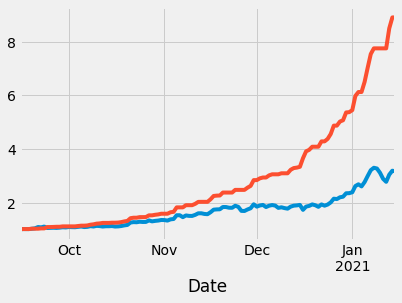

In [ ]:
(1 + (Results['Return'] * Results['Predicted Value'])).cumprod().plot()
(1 + (Results['Return'] * Results['Actual Value'])).cumprod().plot()

In [ ]:
ts_df ['Entry/Exit']=Results['Predicted Value']
ts_df

Close     Open     High      Low  Volumen  daily_return  \
Date                                                                    
2018-01-20  12728.0  11462.0  13002.0  11425.0    46300      0.109097   
2018-01-21  11514.0  12732.0  12732.0  11020.0    53620     -0.095380   
2018-01-22  10771.0  11519.0  11886.0  10009.0    66350     -0.064530   
2018-01-23  10819.0  10770.0  11383.0   9901.1    63850      0.004456   
2018-01-24  11414.0  10811.0  11529.0  10454.0    43820      0.054996   
...             ...      ...      ...      ...      ...           ...   
2021-01-11  35476.0  38226.0  38226.0  31842.0    48040     -0.071941   
2021-01-12  34103.0  35448.0  35838.6  33616.0    22180     -0.038702   
2021-01-13  37375.0  34106.0  37418.0  33160.0    14890      0.095945   
2021-01-14  39170.0  37374.0  39750.0  37193.0    12970      0.048027   
2021-01-15  38856.0  39145.0  39476.0  38856.0    12060     -0.008016   

            ema_signal  emv_signal  bb_signal  macd_signal  rsi_signal  \
Date                                                                     
2018-01-20         1.0         0.0        0.0          1.0         0.0   
2018-01-21         1.0        -1.0        0.0          1.0         0.0   
2018-01-22        -1.0         1.0        0.0          1.0         0.0   
2018-01-23        -1.0         1.0        0.0         -1.0         0.0   
2018-01-24        -1.0         1.0        0.0         -1.0         0.0   
...                ...         ...        ...          ...         ...   
2021-01-11         1.0        -1.0        0.0          1.0        -1.0   
2021-01-12         1.0         1.0        0.0         -1.0         0.0   
2021-01-13         1.0        -1.0        0.0         -1.0         0.0   
2021-01-14         1.0        -1.0       -1.0         -1.0        -1.0   
2021-01-15         1.0        -1.0       -1.0         -1.0         0.0   

            cmf_signal  ichi_signal  kel_signal  aro_signal  vor_signal  \
Date                                                                      
2018-01-20         1.0          0.0        -1.0         1.0         0.0   
2018-01-21         1.0          0.0        -1.0         1.0         0.0   
2018-01-22        -1.0          0.0        -1.0        -1.0         0.0   
2018-01-23         1.0          0.0        -1.0        -1.0        -1.0   
2018-01-24         1.0          0.0        -1.0        -1.0        -1.0   
...                ...          ...         ...         ...         ...   
2021-01-11         1.0          1.0        -1.0         1.0         0.0   
2021-01-12         1.0          1.0        -1.0         1.0         0.0   
2021-01-13         1.0          1.0        -1.0         1.0         0.0   
2021-01-14         1.0          1.0        -1.0         1.0         0.0   
2021-01-15         1.0          1.0        -1.0         1.0         0.0   

            Positive Return  Entry/Exit  
Date                                     
2018-01-20              1.0         NaN  
2018-01-21              0.0         NaN  
2018-01-22              0.0         NaN  
2018-01-23              1.0         NaN  
2018-01-24              1.0         NaN  
...                     ...         ...  
2021-01-11              0.0         1.0  
2021-01-12              0.0         1.0  
2021-01-13              1.0         1.0  
2021-01-14              1.0         1.0  
2021-01-15              0.0         1.0  

[1092 rows x 18 columns]

In [ ]:
ts_df.dropna()

Close     Open     High      Low  Volumen  daily_return  \
Date                                                                    
2020-09-15  10797.0  10690.0  10899.9  10690.0     4990      0.010387   
2020-09-16  10971.3  10797.0  11091.0  10690.9     4800      0.016143   
2020-09-17  10959.0  10971.3  11040.4  10812.7     2510     -0.001121   
2020-09-18  10957.2  10959.0  11022.0  10868.0     2260     -0.000164   
2020-09-19  11099.0  10957.2  11127.0  10957.2     2470      0.012941   
...             ...      ...      ...      ...      ...           ...   
2021-01-11  35476.0  38226.0  38226.0  31842.0    48040     -0.071941   
2021-01-12  34103.0  35448.0  35838.6  33616.0    22180     -0.038702   
2021-01-13  37375.0  34106.0  37418.0  33160.0    14890      0.095945   
2021-01-14  39170.0  37374.0  39750.0  37193.0    12970      0.048027   
2021-01-15  38856.0  39145.0  39476.0  38856.0    12060     -0.008016   

            ema_signal  emv_signal  bb_signal  macd_signal  rsi_signal  \
Date                                                                     
2020-09-15        -1.0         1.0        0.0          1.0         0.0   
2020-09-16        -1.0         1.0        0.0          1.0         0.0   
2020-09-17         1.0         1.0        0.0          1.0         0.0   
2020-09-18         1.0         1.0        0.0          1.0         0.0   
2020-09-19         1.0         1.0        0.0          1.0        -1.0   
...                ...         ...        ...          ...         ...   
2021-01-11         1.0        -1.0        0.0          1.0        -1.0   
2021-01-12         1.0         1.0        0.0         -1.0         0.0   
2021-01-13         1.0        -1.0        0.0         -1.0         0.0   
2021-01-14         1.0        -1.0       -1.0         -1.0        -1.0   
2021-01-15         1.0        -1.0       -1.0         -1.0         0.0   

            cmf_signal  ichi_signal  kel_signal  aro_signal  vor_signal  \
Date                                                                      
2020-09-15         1.0         -1.0        -1.0        -1.0        -1.0   
2020-09-16         1.0         -1.0        -1.0        -1.0        -1.0   
2020-09-17         1.0         -1.0        -1.0        -1.0        -1.0   
2020-09-18         1.0         -1.0        -1.0        -1.0         0.0   
2020-09-19         1.0         -1.0        -1.0        -1.0         0.0   
...                ...          ...         ...         ...         ...   
2021-01-11         1.0          1.0        -1.0         1.0         0.0   
2021-01-12         1.0          1.0        -1.0         1.0         0.0   
2021-01-13         1.0          1.0        -1.0         1.0         0.0   
2021-01-14         1.0          1.0        -1.0         1.0         0.0   
2021-01-15         1.0          1.0        -1.0         1.0         0.0   

            Positive Return  Entry/Exit  
Date                                     
2020-09-15              1.0         1.0  
2020-09-16              1.0         1.0  
2020-09-17              0.0         1.0  
2020-09-18              0.0         1.0  
2020-09-19              1.0         1.0  
...                     ...         ...  
2021-01-11              0.0         1.0  
2021-01-12              0.0         1.0  
2021-01-13              1.0         1.0  
2021-01-14              1.0         1.0  
2021-01-15              0.0         1.0  

[123 rows x 18 columns]

<AxesSubplot:xlabel='Date'>

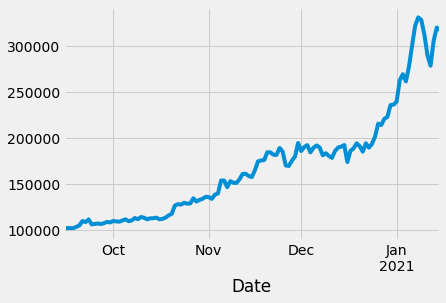

In [ ]:
# Create a chart for model p&l result given an amount of invested capital
# Set initial capital allocation
initial_capital = 100000

# Plot cumulative return of model in terms of capital
cumulative_return_capital = initial_capital * (1 + (Results['Return'] * Results['Predicted Value'])).cumprod()
cumulative_return_capital.plot()